In [1]:
import pandas as pd
#from dataprep.eda import create_report
import matplotlib.pyplot as plt
import seaborn as sns
#from pymongo import MongoClient
import os
import numpy as np
from dotenv import load_dotenv
from sklearn.preprocessing import MinMaxScaler
import matplotlib.dates as mdates
from functions import assign_category, date_engineering, one_hot_encoding, add_activity_quantile, is_weekend

In [2]:
custom_colors = ['#784888', '#94b3c4', '#897cac', '#d8bfd4', '#f6e8e7']
#custom_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f']
#complementary_colors = ['#a9d0f5', '#f3ba8c', '#98e698', '#f5a9a9', '#d8b5d8', '#d2a6a6', '#f5a9f2', '#d8d8d8']

#full_palette = custom_colors + complementary_colors
#sns.set_palette(full_palette)

sns.set_palette(custom_colors)

plt.rcParams['axes.prop_cycle'] = plt.cycler(color=custom_colors)
plt.rcParams['axes.titlesize'] = 35
plt.rcParams['axes.labelsize'] = 30
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['legend.fontsize'] = 15

In [3]:
# Load environment variables
#try:
#    load_dotenv()
#except:
#    pass

#mongo_url = os.getenv('MONGO_URL')
#mongo_port = int(os.getenv('MONGO_PORT'))
#mongo_username = os.getenv('MONGO_USERNAME')
#mongo_password = os.getenv('MONGO_PASSWORD')
#mongo_auth_source = os.getenv('MONGO_AUTH_SOURCE')
#mongo_auth_mechanism = os.getenv('MONGO_AUTH_MECHANISM')

In [4]:
## connect to mongodb
#client = MongoClient(mongo_url, int(mongo_port), username=mongo_username, password=mongo_password,authSource=mongo_auth_source, authMechanism=mongo_auth_mechanism)
#db = client['depresjon-dataset']
#collection = db['depresjon']

In [5]:
#cursor = collection.find({})
#df = pd.DataFrame(list(cursor))
#df

In [6]:
df = pd.read_pickle('../data/depresjon/depresjon_unprocessed.pkl')
df

,date,user_id,activity,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2,madrs_mean
0,2003-05-07,condition_1,174.144444,11,Male,<=45,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,19.0
1,2003-05-08,condition_1,156.247222,11,Male,<=45,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,19.0
2,2003-05-09,condition_1,124.135417,11,Male,<=45,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,19.0
3,2003-05-10,condition_1,134.961806,11,Male,<=45,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,19.0
4,2003-05-11,condition_1,99.439583,11,Male,<=45,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,2004-06-06,condition_9,162.295833,13,Male,>45,1.0,NaN,2.0,6-10,1.0,2.0,26.0,26.0,26.0
401,2004-06-07,condition_9,224.508333,13,Male,>45,1.0,NaN,2.0,6-10,1.0,2.0,26.0,26.0,26.0
402,2004-06-08,condition_9,202.056250,13,Male,>45,1.0,NaN,2.0,6-10,1.0,2.0,26.0,26.0,26.0
403,2004-06-09,condition_9,168.656250,13,Male,>45,1.0,NaN,2.0,6-10,1.0,2.0,26.0,26.0,26.0


In [7]:
df.columns

Index(['date', 'user_id', 'activity', 'days', 'gender', 'age', 'afftype',
       'melanch', 'inpatient', 'edu', 'marriage', 'work', 'madrs1', 'madrs2',
       'madrs_mean'],
      dtype='object')

In [8]:
#df.drop('_id', axis=1, inplace=True)

In [9]:
df = df.rename(columns={'date': 'timestamp'})

In [10]:
df = is_weekend(df)
df

C:\Users\ChristinaKaragianni\Documents\GitHub\-un-fairness-evaluation\notebooks_data_exploration\functions.py:19: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df.timestamp = pd.to_datetime(df.timestamp, infer_datetime_format=True)


,timestamp,user_id,activity,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2,madrs_mean,is_weekend
0,2003-05-07,condition_1,174.144444,11,Male,<=45,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,19.0,0
1,2003-05-08,condition_1,156.247222,11,Male,<=45,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,19.0,0
2,2003-05-09,condition_1,124.135417,11,Male,<=45,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,19.0,0
3,2003-05-10,condition_1,134.961806,11,Male,<=45,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,19.0,1
4,2003-05-11,condition_1,99.439583,11,Male,<=45,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,19.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,2004-06-06,condition_9,162.295833,13,Male,>45,1.0,NaN,2.0,6-10,1.0,2.0,26.0,26.0,26.0,1
401,2004-06-07,condition_9,224.508333,13,Male,>45,1.0,NaN,2.0,6-10,1.0,2.0,26.0,26.0,26.0,0
402,2004-06-08,condition_9,202.056250,13,Male,>45,1.0,NaN,2.0,6-10,1.0,2.0,26.0,26.0,26.0,0
403,2004-06-09,condition_9,168.656250,13,Male,>45,1.0,NaN,2.0,6-10,1.0,2.0,26.0,26.0,26.0,0


In [11]:
df = df.dropna(subset=['madrs_mean'])
df

,timestamp,user_id,activity,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2,madrs_mean,is_weekend
0,2003-05-07,condition_1,174.144444,11,Male,<=45,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,19.0,0
1,2003-05-08,condition_1,156.247222,11,Male,<=45,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,19.0,0
2,2003-05-09,condition_1,124.135417,11,Male,<=45,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,19.0,0
3,2003-05-10,condition_1,134.961806,11,Male,<=45,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,19.0,1
4,2003-05-11,condition_1,99.439583,11,Male,<=45,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,19.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,2004-06-06,condition_9,162.295833,13,Male,>45,1.0,NaN,2.0,6-10,1.0,2.0,26.0,26.0,26.0,1
401,2004-06-07,condition_9,224.508333,13,Male,>45,1.0,NaN,2.0,6-10,1.0,2.0,26.0,26.0,26.0,0
402,2004-06-08,condition_9,202.056250,13,Male,>45,1.0,NaN,2.0,6-10,1.0,2.0,26.0,26.0,26.0,0
403,2004-06-09,condition_9,168.656250,13,Male,>45,1.0,NaN,2.0,6-10,1.0,2.0,26.0,26.0,26.0,0


In [12]:
df.columns

Index(['timestamp', 'user_id', 'activity', 'days', 'gender', 'age', 'afftype',
       'melanch', 'inpatient', 'edu', 'marriage', 'work', 'madrs1', 'madrs2',
       'madrs_mean', 'is_weekend'],
      dtype='object')

In [13]:
df['date'] = pd.to_datetime(df['timestamp'])
df['DayName'] = pd.Series(df['timestamp'].dt.day_name(), index=df.index)
df = df[['timestamp', 'DayName','user_id', 'activity', 'days', 'gender', 'age', 'afftype', 'melanch', 'inpatient', 'edu', 'marriage', 'work', 'madrs1', 'madrs2', 'is_weekend', 'madrs_mean']]
df['user_id'] = df['user_id'].str.replace('condition_', '')
df['user_id'] = pd.to_numeric(df['user_id'], errors='coerce')
df

C:\Users\ChristinaKaragianni\AppData\Local\Temp\ipykernel_18148\121615055.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['user_id'] = df['user_id'].str.replace('condition_', '')
C:\Users\ChristinaKaragianni\AppData\Local\Temp\ipykernel_18148\121615055.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['user_id'] = pd.to_numeric(df['user_id'], errors='coerce')


,timestamp,DayName,user_id,activity,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2,is_weekend,madrs_mean
0,2003-05-07,Wednesday,1,174.144444,11,Male,<=45,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,0,19.0
1,2003-05-08,Thursday,1,156.247222,11,Male,<=45,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,0,19.0
2,2003-05-09,Friday,1,124.135417,11,Male,<=45,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,0,19.0
3,2003-05-10,Saturday,1,134.961806,11,Male,<=45,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,1,19.0
4,2003-05-11,Sunday,1,99.439583,11,Male,<=45,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,1,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,2004-06-06,Sunday,9,162.295833,13,Male,>45,1.0,NaN,2.0,6-10,1.0,2.0,26.0,26.0,1,26.0
401,2004-06-07,Monday,9,224.508333,13,Male,>45,1.0,NaN,2.0,6-10,1.0,2.0,26.0,26.0,0,26.0
402,2004-06-08,Tuesday,9,202.056250,13,Male,>45,1.0,NaN,2.0,6-10,1.0,2.0,26.0,26.0,0,26.0
403,2004-06-09,Wednesday,9,168.656250,13,Male,>45,1.0,NaN,2.0,6-10,1.0,2.0,26.0,26.0,0,26.0


(0.0, 2000.0)

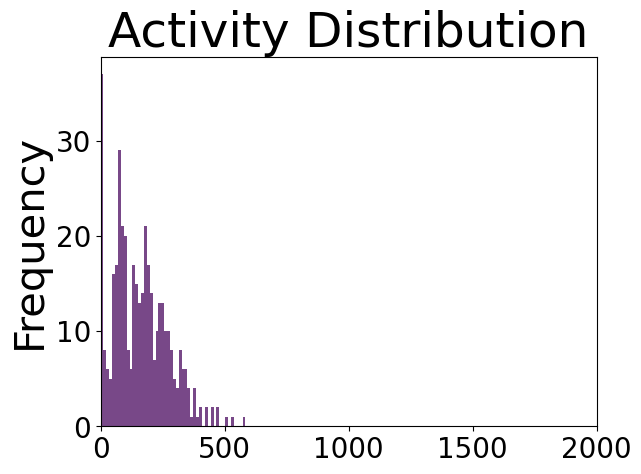

In [14]:
df['activity'].plot(kind='hist', bins=50, title='Activity Distribution')
plt.xlim(0,2000)

In [15]:
#scaler = MinMaxScaler()
#activity_data = df['activity'].values.reshape(-1, 1)
#df['activity'] = scaler.fit_transform(activity_data)
#df

In [16]:
#df['activity'].plot(kind='hist', bins=50, title='Activity Distribution')
#plt.xlim(0,1)

In [17]:
df

,timestamp,DayName,user_id,activity,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2,is_weekend,madrs_mean
0,2003-05-07,Wednesday,1,174.144444,11,Male,<=45,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,0,19.0
1,2003-05-08,Thursday,1,156.247222,11,Male,<=45,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,0,19.0
2,2003-05-09,Friday,1,124.135417,11,Male,<=45,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,0,19.0
3,2003-05-10,Saturday,1,134.961806,11,Male,<=45,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,1,19.0
4,2003-05-11,Sunday,1,99.439583,11,Male,<=45,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,1,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,2004-06-06,Sunday,9,162.295833,13,Male,>45,1.0,NaN,2.0,6-10,1.0,2.0,26.0,26.0,1,26.0
401,2004-06-07,Monday,9,224.508333,13,Male,>45,1.0,NaN,2.0,6-10,1.0,2.0,26.0,26.0,0,26.0
402,2004-06-08,Tuesday,9,202.056250,13,Male,>45,1.0,NaN,2.0,6-10,1.0,2.0,26.0,26.0,0,26.0
403,2004-06-09,Wednesday,9,168.656250,13,Male,>45,1.0,NaN,2.0,6-10,1.0,2.0,26.0,26.0,0,26.0


In [18]:
# Get a list of unique participants
#participants = df['user_id'].unique()

#for participant in participants:
#    user_data = df[df['user_id'] == participant]
#    user_data['timestamp'] = pd.to_datetime(user_data['timestamp'])
#    user_data['Date'] = user_data['timestamp'].dt.date
#    user_data['Time'] = user_data['timestamp'].dt.time

#    unique_days = user_data['Date'].unique()

#    fig, axes = plt.subplots(len(unique_days), 1, figsize=(10, 2 * len(unique_days)), sharex=True)
#    user_data['TimeDelta'] = user_data['timestamp'] - user_data['timestamp'].dt.normalize()
#    user_data['Minutes'] = user_data['TimeDelta'].dt.total_seconds() / 60

#    for ax, day in zip(axes, unique_days):
#        day_data = user_data[user_data['Date'] == day]
#        ax.bar(day_data['Minutes'], day_data['activity'], width=1, align='edge')
#        ax.set_title(f'Activity on {day} - Participant {participant}')
#        ax.set_ylabel('Activity')
#    plt.grid(True)
#    plt.xticks(ticks=range(0, 1440, 60), labels=[f"{str(i).zfill(2)}:00" for i in range(24)],#rotation=90)
#   plt.xlim(0, 1440)  # Set x-axis limit to cover one day
#    plt.xlabel('Minutes since start of day')
#    plt.tight_layout()
#    plt.savefig("../visualizations/depresjon/activity_actigraphy-participant%s.png"%participant,#bbox_inches='tight')
#   plt.savefig("../visualizations/depresjon/activity_actigraphy-participant%s.eps"%participant,bbox_inches='tight')
#    plt.close()

In [19]:
df

,timestamp,DayName,user_id,activity,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2,is_weekend,madrs_mean
0,2003-05-07,Wednesday,1,174.144444,11,Male,<=45,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,0,19.0
1,2003-05-08,Thursday,1,156.247222,11,Male,<=45,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,0,19.0
2,2003-05-09,Friday,1,124.135417,11,Male,<=45,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,0,19.0
3,2003-05-10,Saturday,1,134.961806,11,Male,<=45,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,1,19.0
4,2003-05-11,Sunday,1,99.439583,11,Male,<=45,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,1,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,2004-06-06,Sunday,9,162.295833,13,Male,>45,1.0,NaN,2.0,6-10,1.0,2.0,26.0,26.0,1,26.0
401,2004-06-07,Monday,9,224.508333,13,Male,>45,1.0,NaN,2.0,6-10,1.0,2.0,26.0,26.0,0,26.0
402,2004-06-08,Tuesday,9,202.056250,13,Male,>45,1.0,NaN,2.0,6-10,1.0,2.0,26.0,26.0,0,26.0
403,2004-06-09,Wednesday,9,168.656250,13,Male,>45,1.0,NaN,2.0,6-10,1.0,2.0,26.0,26.0,0,26.0


<Axes: title={'center': 'madrs_mean'}, ylabel='Frequency'>

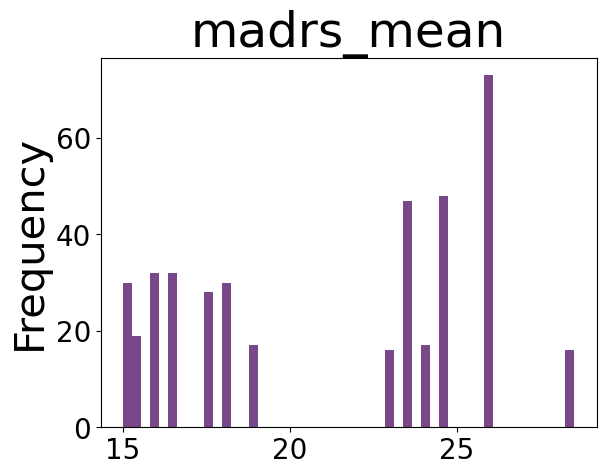

In [20]:
df['madrs_mean'].plot(kind='hist', bins=50, title='madrs_mean')

In [21]:
df["category_madrs"] = df["madrs_mean"].apply(assign_category) # in this way we transform the problem into a binary classification problem
df

,timestamp,DayName,user_id,activity,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2,is_weekend,madrs_mean,category_madrs
0,2003-05-07,Wednesday,1,174.144444,11,Male,<=45,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,0,19.0,mild depression
1,2003-05-08,Thursday,1,156.247222,11,Male,<=45,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,0,19.0,mild depression
2,2003-05-09,Friday,1,124.135417,11,Male,<=45,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,0,19.0,mild depression
3,2003-05-10,Saturday,1,134.961806,11,Male,<=45,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,1,19.0,mild depression
4,2003-05-11,Sunday,1,99.439583,11,Male,<=45,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,1,19.0,mild depression
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,2004-06-06,Sunday,9,162.295833,13,Male,>45,1.0,NaN,2.0,6-10,1.0,2.0,26.0,26.0,1,26.0,moderate depression
401,2004-06-07,Monday,9,224.508333,13,Male,>45,1.0,NaN,2.0,6-10,1.0,2.0,26.0,26.0,0,26.0,moderate depression
402,2004-06-08,Tuesday,9,202.056250,13,Male,>45,1.0,NaN,2.0,6-10,1.0,2.0,26.0,26.0,0,26.0,moderate depression
403,2004-06-09,Wednesday,9,168.656250,13,Male,>45,1.0,NaN,2.0,6-10,1.0,2.0,26.0,26.0,0,26.0,moderate depression


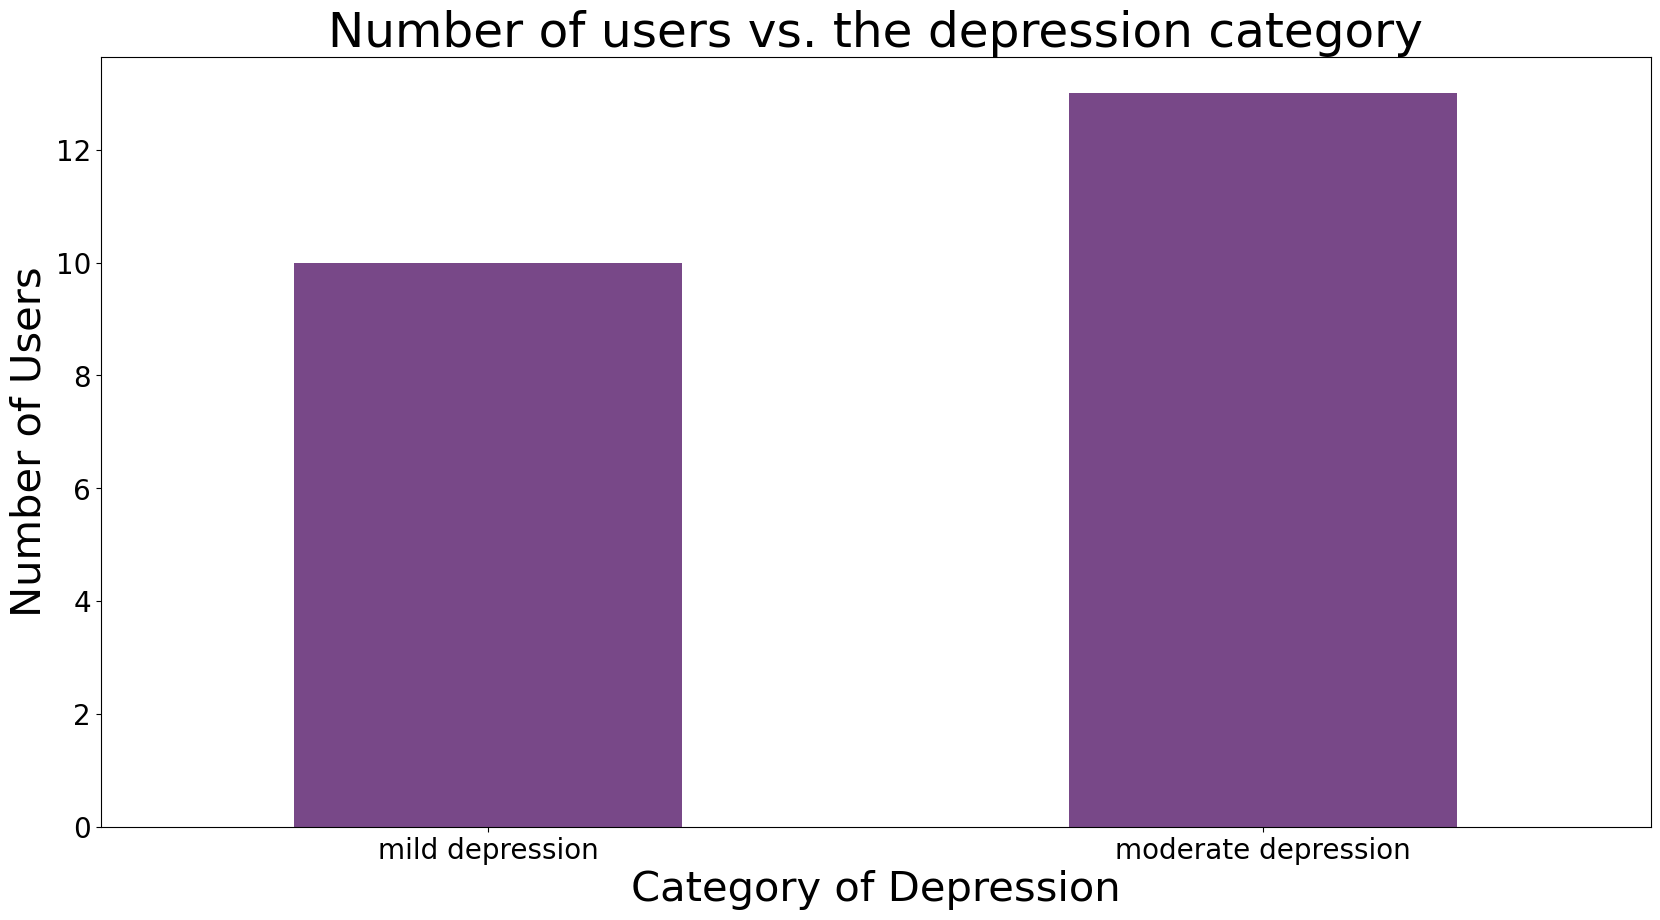

In [22]:
category_user_counts = df.groupby('category_madrs')['user_id'].nunique()
plt.figure(figsize=(20, 10))
category_user_counts.plot(kind='bar')
plt.title('Number of users vs. the depression category')
plt.xlabel('Category of Depression')
plt.ylabel('Number of Users')
plt.xticks(rotation=0)
plt.savefig("../visualizations/depresjon/binary-problem.png",bbox_inches='tight')
plt.savefig("../visualizations/depresjon/binary-problem.eps",bbox_inches='tight')
plt.show()

In [23]:
# Create a new column 'is_sleeping' which is 1 if the activity is below 100 and the timestamp is between midnight and 7 AM
#user_data['is_sleeping'] = ((user_data['activity'] < 100) & ((user_data['timestamp'].dt.hour >= 0) & (user_data['timestamp'].dt.hour < 7))).astype(int)

In [24]:
df = date_engineering(df)
df

,timestamp,DayName,user_id,activity,days,gender,age,afftype,melanch,inpatient,...,madrs_mean,category_madrs,month_sin,weekday_sin,week_sin,day_sin,month_cos,weekday_cos,week_cos,day_cos
0,2003-05-07,Wednesday,1,174.144444,11,Male,<=45,2.0,2.0,2.0,...,19.0,mild depression,-0.974928,0.974928,-0.998027,0.988468,-0.222521,-0.222521,0.062791,0.151428
1,2003-05-08,Thursday,1,156.247222,11,Male,<=45,2.0,2.0,2.0,...,19.0,mild depression,-0.974928,0.433884,-0.998027,0.998717,-0.222521,-0.900969,0.062791,-0.050649
2,2003-05-09,Friday,1,124.135417,11,Male,<=45,2.0,2.0,2.0,...,19.0,mild depression,-0.974928,-0.433884,-0.998027,0.968077,-0.222521,-0.900969,0.062791,-0.250653
3,2003-05-10,Saturday,1,134.961806,11,Male,<=45,2.0,2.0,2.0,...,19.0,mild depression,-0.974928,-0.974928,-0.998027,0.897805,-0.222521,-0.222521,0.062791,-0.440394
4,2003-05-11,Sunday,1,99.439583,11,Male,<=45,2.0,2.0,2.0,...,19.0,mild depression,-0.974928,-0.781831,-0.998027,0.790776,-0.222521,0.623490,0.062791,-0.612106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,2004-06-06,Sunday,9,162.295833,13,Male,>45,1.0,NaN,2.0,...,26.0,moderate depression,-0.781831,-0.781831,-0.481754,0.937752,0.623490,0.623490,0.876307,0.347305
401,2004-06-07,Monday,9,224.508333,13,Male,>45,1.0,NaN,2.0,...,26.0,moderate depression,-0.781831,0.000000,-0.24869,0.988468,0.623490,1.000000,0.968583,0.151428
402,2004-06-08,Tuesday,9,202.056250,13,Male,>45,1.0,NaN,2.0,...,26.0,moderate depression,-0.781831,0.781831,-0.24869,0.998717,0.623490,0.623490,0.968583,-0.050649
403,2004-06-09,Wednesday,9,168.656250,13,Male,>45,1.0,NaN,2.0,...,26.0,moderate depression,-0.781831,0.974928,-0.24869,0.968077,0.623490,-0.222521,0.968583,-0.250653


In [25]:
df.drop(columns= ['DayName', 'madrs1', 'madrs2', 'madrs_mean'], axis=1, inplace=True)
df

,timestamp,user_id,activity,days,gender,age,afftype,melanch,inpatient,edu,...,is_weekend,category_madrs,month_sin,weekday_sin,week_sin,day_sin,month_cos,weekday_cos,week_cos,day_cos
0,2003-05-07,1,174.144444,11,Male,<=45,2.0,2.0,2.0,6-10,...,0,mild depression,-0.974928,0.974928,-0.998027,0.988468,-0.222521,-0.222521,0.062791,0.151428
1,2003-05-08,1,156.247222,11,Male,<=45,2.0,2.0,2.0,6-10,...,0,mild depression,-0.974928,0.433884,-0.998027,0.998717,-0.222521,-0.900969,0.062791,-0.050649
2,2003-05-09,1,124.135417,11,Male,<=45,2.0,2.0,2.0,6-10,...,0,mild depression,-0.974928,-0.433884,-0.998027,0.968077,-0.222521,-0.900969,0.062791,-0.250653
3,2003-05-10,1,134.961806,11,Male,<=45,2.0,2.0,2.0,6-10,...,1,mild depression,-0.974928,-0.974928,-0.998027,0.897805,-0.222521,-0.222521,0.062791,-0.440394
4,2003-05-11,1,99.439583,11,Male,<=45,2.0,2.0,2.0,6-10,...,1,mild depression,-0.974928,-0.781831,-0.998027,0.790776,-0.222521,0.623490,0.062791,-0.612106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,2004-06-06,9,162.295833,13,Male,>45,1.0,NaN,2.0,6-10,...,1,moderate depression,-0.781831,-0.781831,-0.481754,0.937752,0.623490,0.623490,0.876307,0.347305
401,2004-06-07,9,224.508333,13,Male,>45,1.0,NaN,2.0,6-10,...,0,moderate depression,-0.781831,0.000000,-0.24869,0.988468,0.623490,1.000000,0.968583,0.151428
402,2004-06-08,9,202.056250,13,Male,>45,1.0,NaN,2.0,6-10,...,0,moderate depression,-0.781831,0.781831,-0.24869,0.998717,0.623490,0.623490,0.968583,-0.050649
403,2004-06-09,9,168.656250,13,Male,>45,1.0,NaN,2.0,6-10,...,0,moderate depression,-0.781831,0.974928,-0.24869,0.968077,0.623490,-0.222521,0.968583,-0.250653


In [26]:
df['age'].value_counts()

age
<=45    215
>45     190
Name: count, dtype: int64

In [27]:
df = one_hot_encoding(df)
df

C:\Users\ChristinaKaragianni\Documents\GitHub\-un-fairness-evaluation\notebooks_data_exploration\functions.py:77: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['edu'].replace(to_replace=['', '6-10', '11-15', '16-20'], value=[0, 1, 2, 3], inplace=True)
C:\Users\ChristinaKaragianni\Documents\GitHub\-un-fairness-evaluation\notebooks_data_exploration\functions.py:79: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in panda

,timestamp,user_id,activity,days,gender,age,afftype,melanch,inpatient,edu,...,is_weekend,category_madrs,month_sin,weekday_sin,week_sin,day_sin,month_cos,weekday_cos,week_cos,day_cos
0,2003-05-07,1,174.144444,11,0,0,2.0,2.0,2.0,1,...,0,1,-0.974928,0.974928,-0.998027,0.988468,-0.222521,-0.222521,0.062791,0.151428
1,2003-05-08,1,156.247222,11,0,0,2.0,2.0,2.0,1,...,0,1,-0.974928,0.433884,-0.998027,0.998717,-0.222521,-0.900969,0.062791,-0.050649
2,2003-05-09,1,124.135417,11,0,0,2.0,2.0,2.0,1,...,0,1,-0.974928,-0.433884,-0.998027,0.968077,-0.222521,-0.900969,0.062791,-0.250653
3,2003-05-10,1,134.961806,11,0,0,2.0,2.0,2.0,1,...,1,1,-0.974928,-0.974928,-0.998027,0.897805,-0.222521,-0.222521,0.062791,-0.440394
4,2003-05-11,1,99.439583,11,0,0,2.0,2.0,2.0,1,...,1,1,-0.974928,-0.781831,-0.998027,0.790776,-0.222521,0.623490,0.062791,-0.612106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,2004-06-06,9,162.295833,13,0,1,1.0,NaN,2.0,1,...,1,0,-0.781831,-0.781831,-0.481754,0.937752,0.623490,0.623490,0.876307,0.347305
401,2004-06-07,9,224.508333,13,0,1,1.0,NaN,2.0,1,...,0,0,-0.781831,0.000000,-0.24869,0.988468,0.623490,1.000000,0.968583,0.151428
402,2004-06-08,9,202.056250,13,0,1,1.0,NaN,2.0,1,...,0,0,-0.781831,0.781831,-0.24869,0.998717,0.623490,0.623490,0.968583,-0.050649
403,2004-06-09,9,168.656250,13,0,1,1.0,NaN,2.0,1,...,0,0,-0.781831,0.974928,-0.24869,0.968077,0.623490,-0.222521,0.968583,-0.250653


In [28]:
df = add_activity_quantile(df)
df

C:\Users\ChristinaKaragianni\Documents\GitHub\-un-fairness-evaluation\notebooks_data_exploration\functions.py:95: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['activity_quantile'].replace(to_replace=['low', 'medium', 'high'], value=[0, 1, 2], inplace=True)
C:\Users\ChristinaKaragianni\Documents\GitHub\-un-fairness-evaluation\notebooks_data_exploration\functions.py:95: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.i

,timestamp,user_id,activity,days,gender,age,afftype,melanch,inpatient,edu,...,month_sin,weekday_sin,week_sin,day_sin,month_cos,weekday_cos,week_cos,day_cos,activity_quantile,user_activity_quantile
0,2003-05-07,1,174.144444,11,0,0,2.0,2.0,2.0,1,...,-0.974928,0.974928,-0.998027,0.988468,-0.222521,-0.222521,0.062791,0.151428,1,1
1,2003-05-08,1,156.247222,11,0,0,2.0,2.0,2.0,1,...,-0.974928,0.433884,-0.998027,0.998717,-0.222521,-0.900969,0.062791,-0.050649,1,1
2,2003-05-09,1,124.135417,11,0,0,2.0,2.0,2.0,1,...,-0.974928,-0.433884,-0.998027,0.968077,-0.222521,-0.900969,0.062791,-0.250653,1,1
3,2003-05-10,1,134.961806,11,0,0,2.0,2.0,2.0,1,...,-0.974928,-0.974928,-0.998027,0.897805,-0.222521,-0.222521,0.062791,-0.440394,1,1
4,2003-05-11,1,99.439583,11,0,0,2.0,2.0,2.0,1,...,-0.974928,-0.781831,-0.998027,0.790776,-0.222521,0.623490,0.062791,-0.612106,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,2004-06-06,9,162.295833,13,0,1,1.0,NaN,2.0,1,...,-0.781831,-0.781831,-0.481754,0.937752,0.623490,0.623490,0.876307,0.347305,1,0
401,2004-06-07,9,224.508333,13,0,1,1.0,NaN,2.0,1,...,-0.781831,0.000000,-0.24869,0.988468,0.623490,1.000000,0.968583,0.151428,1,2
402,2004-06-08,9,202.056250,13,0,1,1.0,NaN,2.0,1,...,-0.781831,0.781831,-0.24869,0.998717,0.623490,0.623490,0.968583,-0.050649,1,2
403,2004-06-09,9,168.656250,13,0,1,1.0,NaN,2.0,1,...,-0.781831,0.974928,-0.24869,0.968077,0.623490,-0.222521,0.968583,-0.250653,1,1


In [29]:
df.columns

Index(['timestamp', 'user_id', 'activity', 'days', 'gender', 'age', 'afftype',
       'melanch', 'inpatient', 'edu', 'marriage', 'work', 'is_weekend',
       'category_madrs', 'month_sin', 'weekday_sin', 'week_sin', 'day_sin',
       'month_cos', 'weekday_cos', 'week_cos', 'day_cos', 'activity_quantile',
       'user_activity_quantile'],
      dtype='object')

In [30]:
df['melanch'].isna().sum()

45

In [31]:
# Calculate the global mode for the 'melanch' column
global_mode = df['melanch'].mode().iloc[0]

# Fill remaining NaN values in the 'melanch' column with the global mode
df['melanch'].fillna(global_mode, inplace=True)

C:\Users\ChristinaKaragianni\AppData\Local\Temp\ipykernel_18148\1395590358.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['melanch'].fillna(global_mode, inplace=True)


In [32]:
df = df[df['edu'] != ' ']

In [34]:
df

,timestamp,user_id,activity,days,gender,age,afftype,melanch,inpatient,edu,...,month_sin,weekday_sin,week_sin,day_sin,month_cos,weekday_cos,week_cos,day_cos,activity_quantile,user_activity_quantile
0,2003-05-07,1,174.144444,11,0,0,2.0,2.0,2.0,1,...,-0.974928,0.974928,-0.998027,0.988468,-0.222521,-0.222521,0.062791,0.151428,1,1
1,2003-05-08,1,156.247222,11,0,0,2.0,2.0,2.0,1,...,-0.974928,0.433884,-0.998027,0.998717,-0.222521,-0.900969,0.062791,-0.050649,1,1
2,2003-05-09,1,124.135417,11,0,0,2.0,2.0,2.0,1,...,-0.974928,-0.433884,-0.998027,0.968077,-0.222521,-0.900969,0.062791,-0.250653,1,1
3,2003-05-10,1,134.961806,11,0,0,2.0,2.0,2.0,1,...,-0.974928,-0.974928,-0.998027,0.897805,-0.222521,-0.222521,0.062791,-0.440394,1,1
4,2003-05-11,1,99.439583,11,0,0,2.0,2.0,2.0,1,...,-0.974928,-0.781831,-0.998027,0.790776,-0.222521,0.623490,0.062791,-0.612106,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,2004-06-06,9,162.295833,13,0,1,1.0,2.0,2.0,1,...,-0.781831,-0.781831,-0.481754,0.937752,0.623490,0.623490,0.876307,0.347305,1,0
401,2004-06-07,9,224.508333,13,0,1,1.0,2.0,2.0,1,...,-0.781831,0.000000,-0.24869,0.988468,0.623490,1.000000,0.968583,0.151428,1,2
402,2004-06-08,9,202.056250,13,0,1,1.0,2.0,2.0,1,...,-0.781831,0.781831,-0.24869,0.998717,0.623490,0.623490,0.968583,-0.050649,1,2
403,2004-06-09,9,168.656250,13,0,1,1.0,2.0,2.0,1,...,-0.781831,0.974928,-0.24869,0.968077,0.623490,-0.222521,0.968583,-0.250653,1,1


In [35]:
for column in df.columns:
    df[column] = pd.to_numeric(df[column], errors='coerce')

C:\Users\ChristinaKaragianni\AppData\Local\Temp\ipykernel_18148\710412134.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = pd.to_numeric(df[column], errors='coerce')


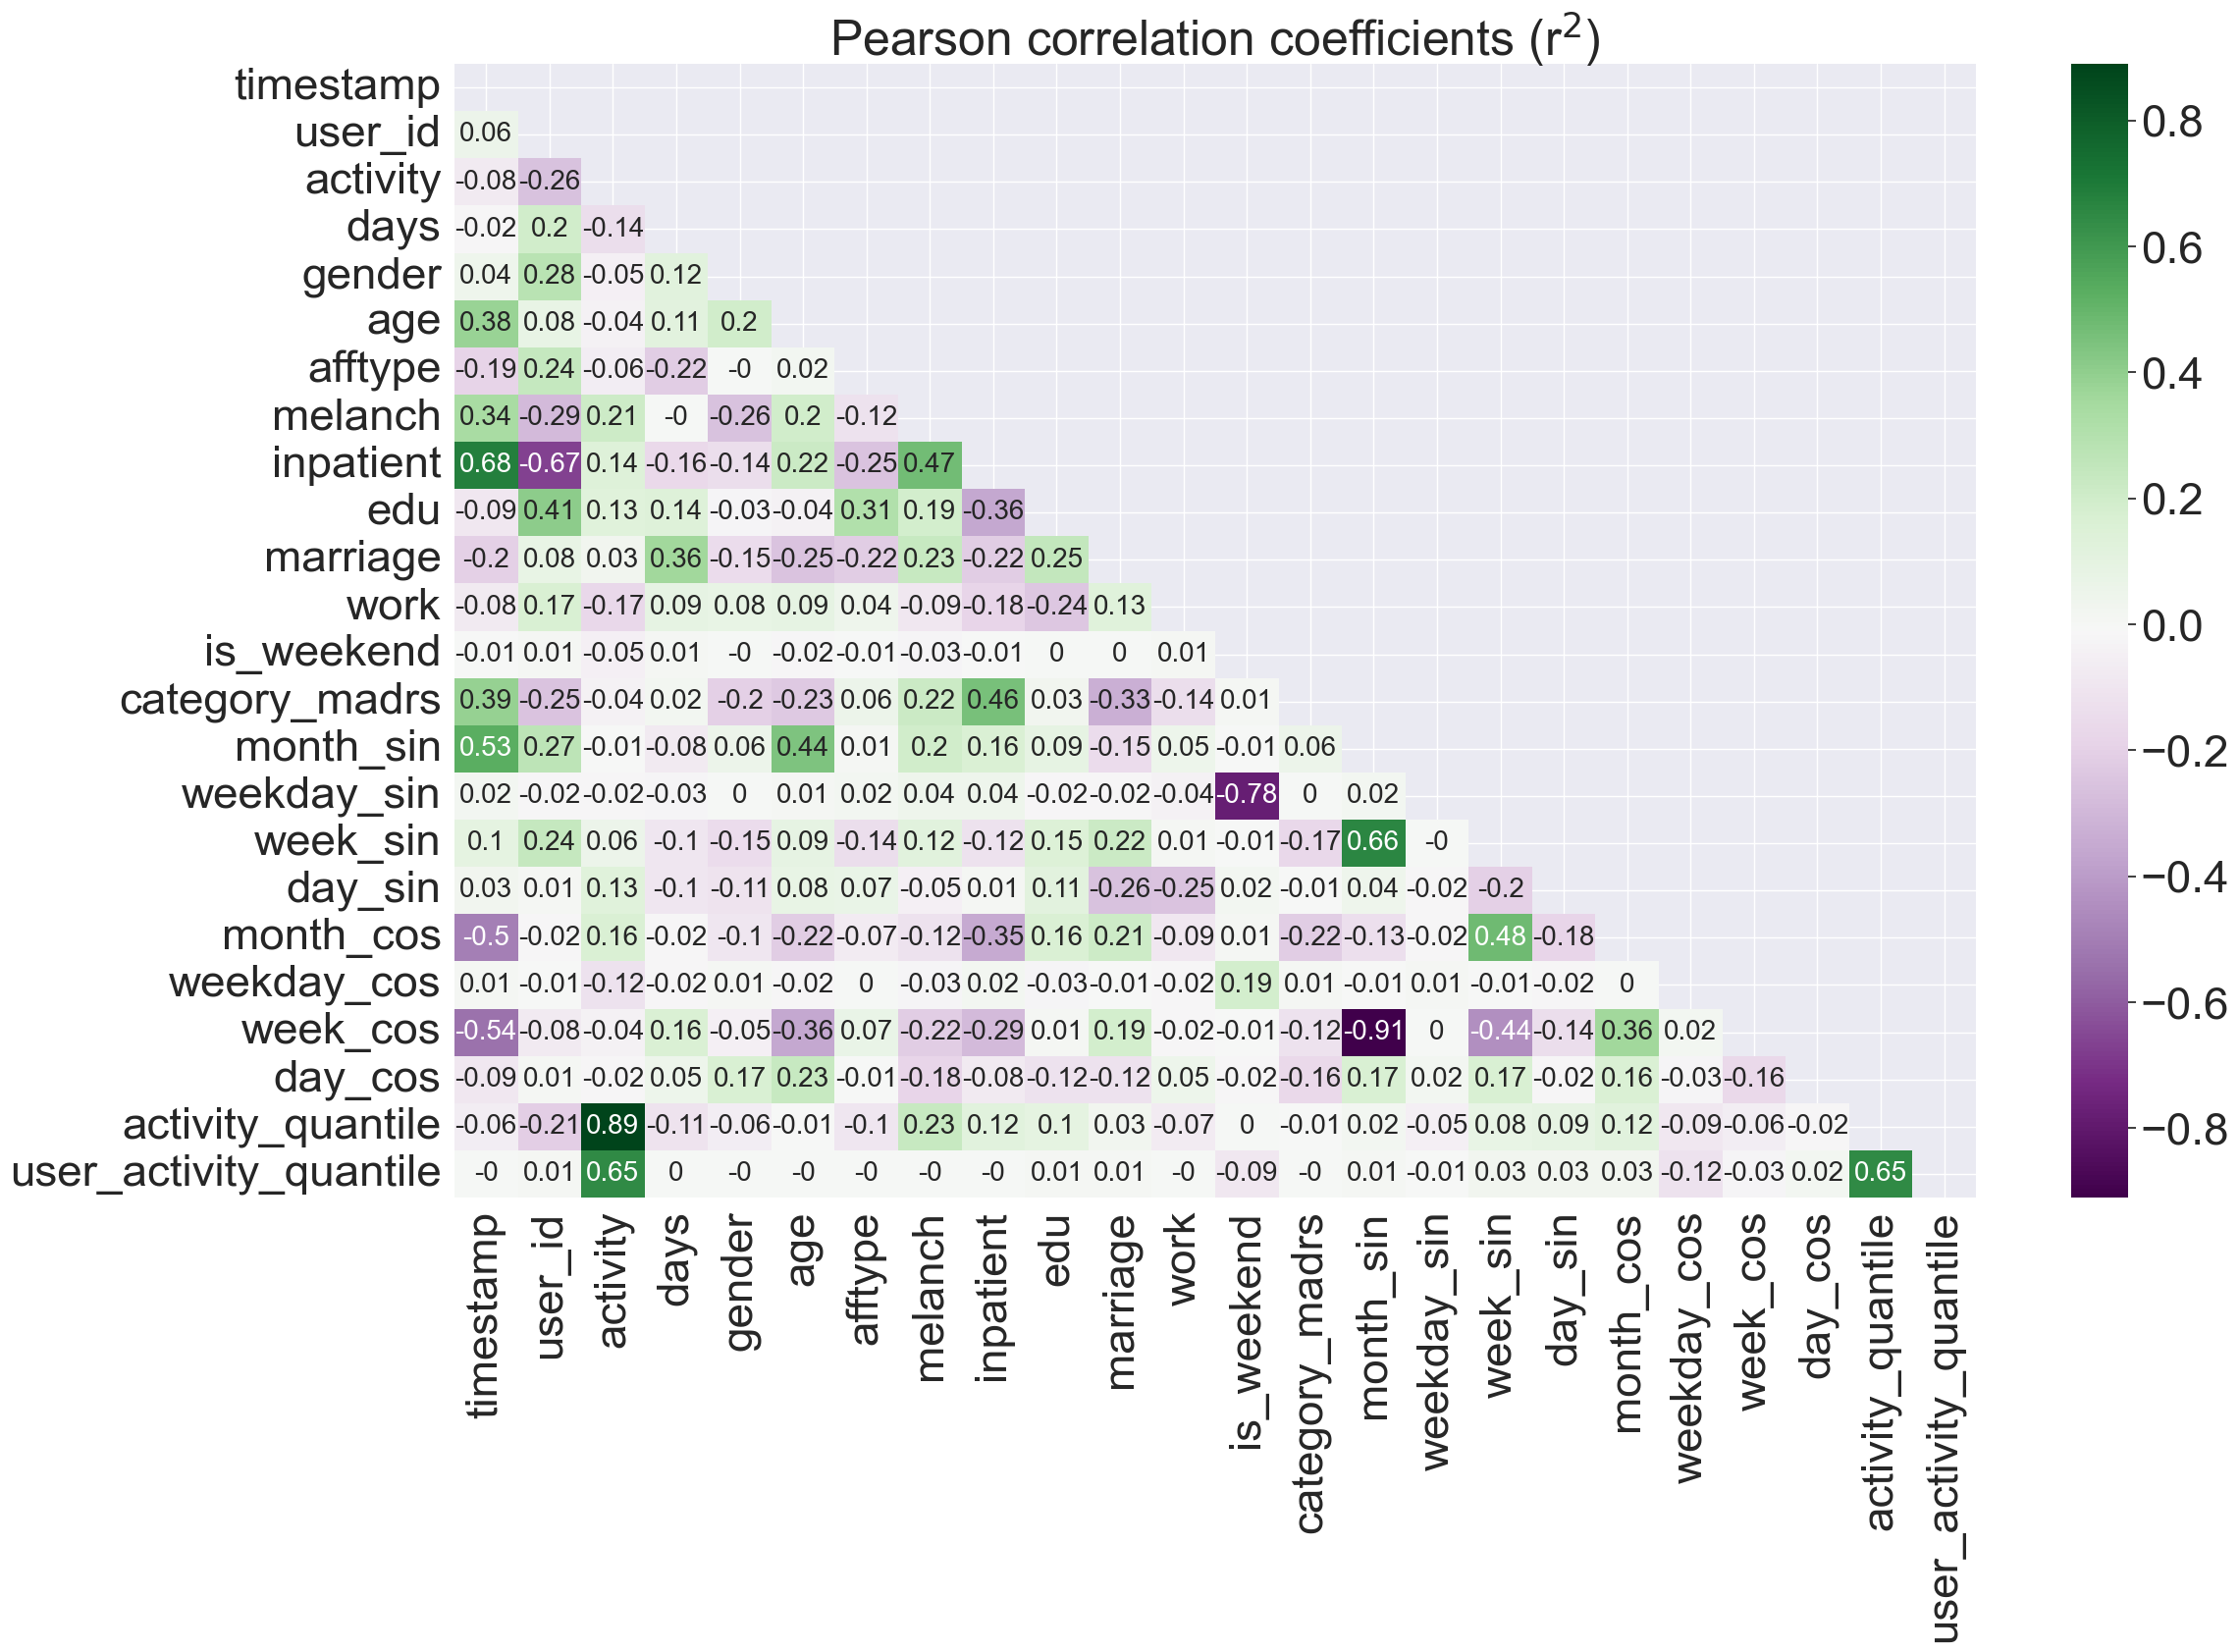

In [37]:
fig = plt.gcf()
fig.set_size_inches(25, 15)
sns.set(font_scale = 3)
correlation_matrix = df.corr().round(2)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(data=correlation_matrix, annot=True, annot_kws={"size":20}, mask=mask, cmap='PRGn', xticklabels=True, yticklabels=True)
#plt.text(32, 20, 'Pearson correlation coefficients (r$^2$)', rotation=270, fontsize=50)
plt.title('Pearson correlation coefficients (r$^2$)')
plt.savefig("../visualizations/depresjon/correlation_matrix.png",bbox_inches='tight')
plt.savefig("../visualizations/depresjon/correlation_matrix.eps",bbox_inches='tight')
plt.show()

In [38]:
df.to_pickle("../data/depresjon/depresjon_preprocessed.pkl")